In [6]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

# Reading the dataset

In [8]:
rates_df = pd.read_csv('/Users/anilkumar/Downloads/Crime.csv')
rates_df

,States,murder,rape,robbery,assault,burglary,larceny,auto
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


# Dimesions

In [9]:
rates_df.shape
print("Data Frame Dimmensions are", rates_df.shape)
print('No of rows:', rates_df.shape[0])
print('No of columns:', rates_df.shape[1])

Data Frame Dimmensions are (50, 8)
No of rows: 50
No of columns: 8


In [10]:
rates_df.head(10)

,States,murder,rape,robbery,assault,burglary,larceny,auto
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [11]:
rates_df.set_index('States', inplace=True)
# Display records of rates_df data frame.
rates_df

,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4


In [12]:
rates_df.shape
print("Data Frame Dimmensions After Adding Index", rates_df.shape)
print('No of rows:', rates_df.shape[0])
print('No of columns:', rates_df.shape[1])

Data Frame Dimmensions After Adding Index (50, 7)
No of rows: 50
No of columns: 7


In [20]:
np.round(rates_df.describe(), decimals=2)

,murder,rape,robbery,assault,burglary,larceny,auto
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,7.44,25.73,124.09,211.30,1291.90,2671.29,377.53
std,3.87,10.76,88.35,100.25,432.46,725.91,193.39
min,0.90,9.00,13.30,43.80,446.10,1239.90,144.40
25%,4.22,18.33,64.95,148.85,1000.08,2248.90,245.78
50%,7.30,24.10,106.05,197.60,1265.05,2617.45,333.85
75%,10.10,32.52,155.85,282.58,1529.82,3007.60,460.12
max,15.80,51.60,472.60,485.30,2453.10,4467.40,1140.10


In [26]:
rates_df_norm = rates_df.apply(preprocessing.scale, axis=1)

# Pandas uses sample standard deviation; will apply in cluster analysis. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()
rates_df_norm_round = np.round((rates_df - rates_df.mean())/rates_df.std(), 
                          decimals=2)

# Display records of rates_df data frame.
print('Normalized Input Variables for Utilities')
rates_df_norm_round.head(10)

Normalized Input Variables for Utilities


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,1.75,-0.05,-0.31,0.67,-0.36,-1.09,-0.50
ALASKA,0.87,2.40,-0.31,0.73,0.09,0.96,1.94
ARIZONA,0.53,0.79,0.16,1.01,2.44,2.47,0.32
ARKANSAS,0.35,0.17,-0.46,-0.08,-0.74,-1.11,-1.00
CALIFORNIA,1.05,2.20,1.84,1.46,1.96,1.14,1.48
COLORADO,-0.30,1.51,0.53,0.81,1.49,1.70,0.51
CONNECTICUT,-0.84,-0.83,0.06,-0.79,0.13,-0.07,1.12
DELAWARE,-0.37,-0.08,0.37,-0.17,0.90,1.39,0.46
FLORIDA,0.71,1.29,0.72,2.37,1.31,1.61,-0.14


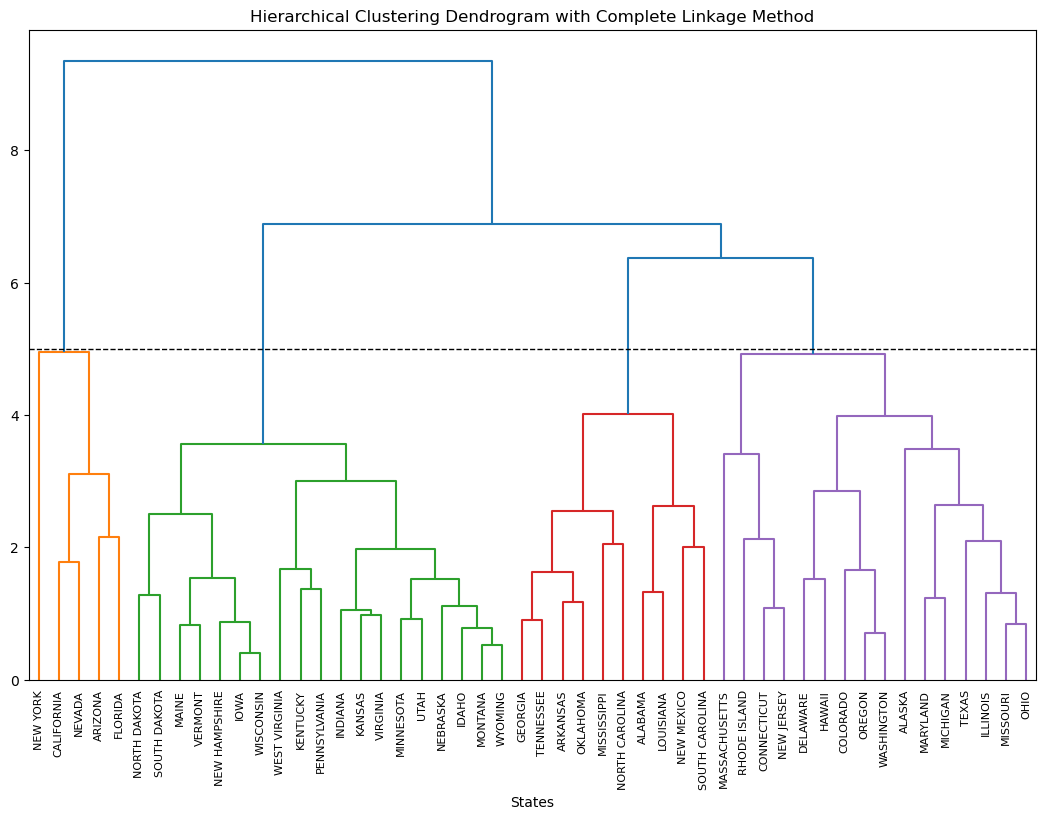

In [30]:
hi_complete = linkage(rates_df_norm, method='complete')

# Develop plot parameters, title and labels.  
fig = plt.figure(figsize=(13, 10))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage Method')
plt.xlabel('States')


dendrogram(hi_complete, labels=rates_df_norm.index, color_threshold= 5.0)

plt.axhline(y=5.0, color='black', linewidth=1.0, linestyle='dashed')
plt.show()



In [16]:
# Develop cluster membership for agglomerative clustering using complete
# linkage method. The number of clusters is assigned to be 5 as shown
# in the dendrogram with complete linkage.  
memb_cmp = fcluster(hi_complete, 5, criterion='maxclust')
memb_cmp = pd.Series(memb_cmp, index=rates_df_norm.index)

# Display cluster memberships for 5 clusters.  
print('Cluster Membership for 5 Clusters Using  Complete Linkage Method')
for key, item in memb_cmp.groupby(memb_cmp):
    print(key, ' : ',' , '.join(item.index))

Cluster Membership for 5 Clusters Using  Complete Linkage Method
1  :  ARIZONA , CALIFORNIA , FLORIDA , NEVADA
2  :  NEW YORK
3  :  IDAHO , INDIANA , IOWA , KANSAS , KENTUCKY , MAINE , MINNESOTA , MONTANA , NEBRASKA , NEW HAMPSHIRE , NORTH DAKOTA , PENNSYLVANIA , SOUTH DAKOTA , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN , WYOMING
4  :  ALABAMA , ARKANSAS , GEORGIA , LOUISIANA , MISSISSIPPI , NEW MEXICO , NORTH CAROLINA , OKLAHOMA , SOUTH CAROLINA , TENNESSEE
5  :  ALASKA , COLORADO , CONNECTICUT , DELAWARE , HAWAII , ILLINOIS , MARYLAND , MASSACHUSETTS , MICHIGAN , MISSOURI , NEW JERSEY , OHIO , OREGON , RHODE ISLAND , TEXAS , WASHINGTON


In [17]:
# Create data frame with original cluster means for each 
# cluster and each input variable (measurement).
clust_mean = rates_df.groupby(memb_cmp).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean
# data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with complete Linkage Method')
clust_mean

Means of Input Variables for Clusters with complete Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,11.750,43.075,234.050,368.600,2199.625,4005.075,503.400,Cluster 1
2,10.700,29.400,472.600,319.100,1728.000,2782.000,745.800,Cluster 2
3,4.532,17.111,59.200,125.847,933.816,2323.916,257.058,Cluster 3
4,11.450,28.240,102.550,281.870,1227.460,2101.740,258.160,Cluster 4
5,7.119,29.844,165.344,222.606,1503.225,3099.394,540.700,Cluster 5


In [18]:
# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = rates_df_norm.groupby(memb_cmp).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Complete Linkage Method')
clust_mean_norm

Normalized Means of Input Variables for Clusters with Complete Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,1.114,1.612,1.245,1.569,2.099,1.837,0.651,Cluster 1
2,0.842,0.341,3.945,1.075,1.008,0.153,1.904,Cluster 2
3,-0.753,-0.801,-0.734,-0.852,-0.828,-0.479,-0.623,Cluster 3
4,1.036,0.233,-0.244,0.704,-0.149,-0.785,-0.617,Cluster 4
5,-0.084,0.382,0.467,0.113,0.489,0.590,0.844,Cluster 5


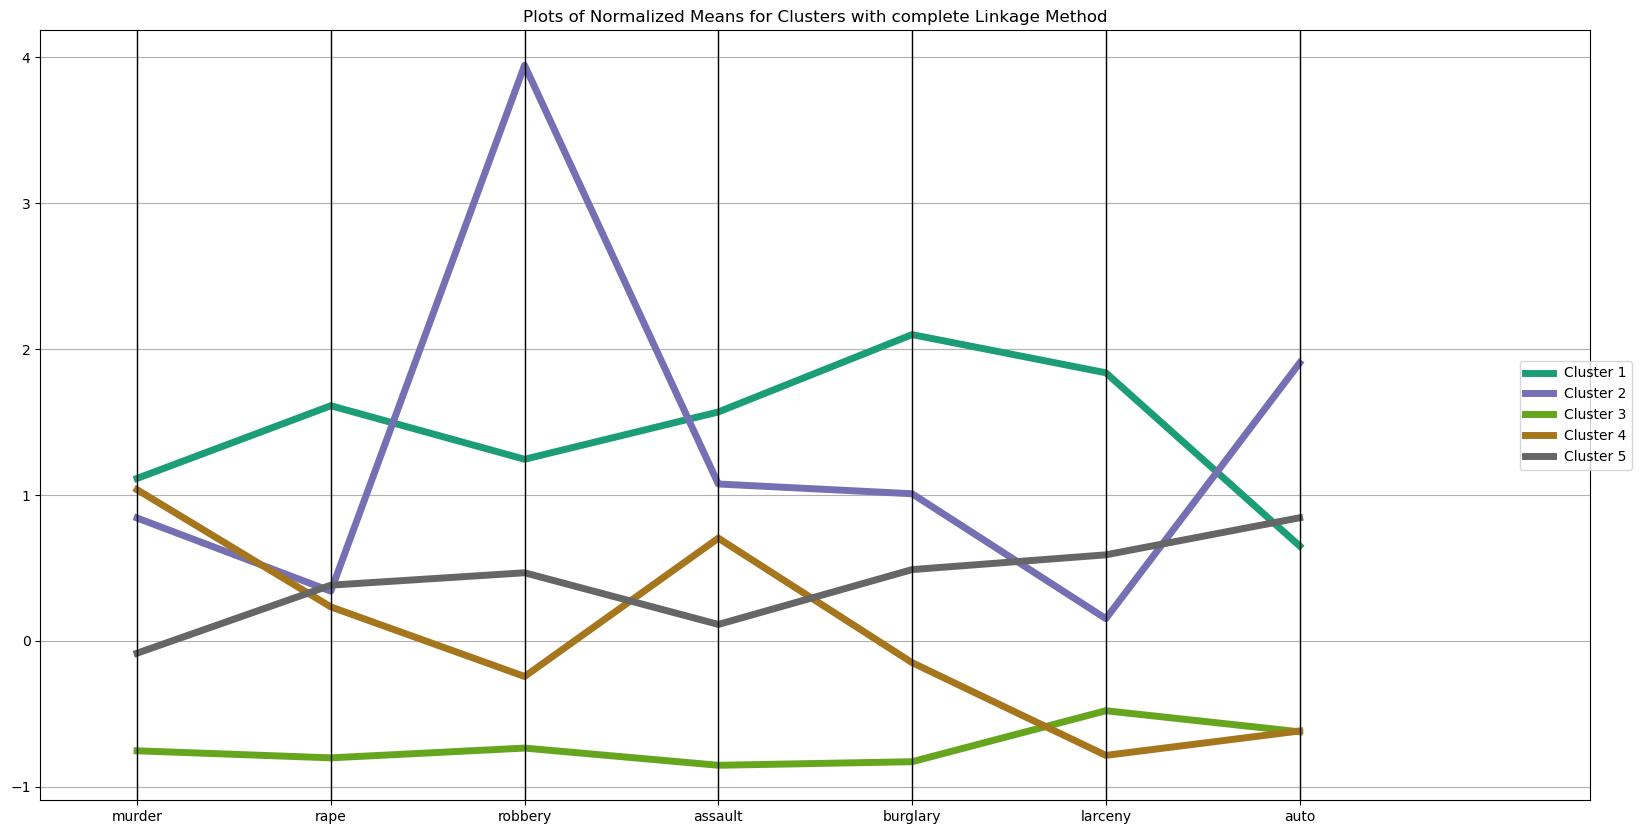

In [265]:
plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with complete Linkage Method')
plt.show()


Heatmap for Utulities Hierachical Clustering with complete Linkage Method


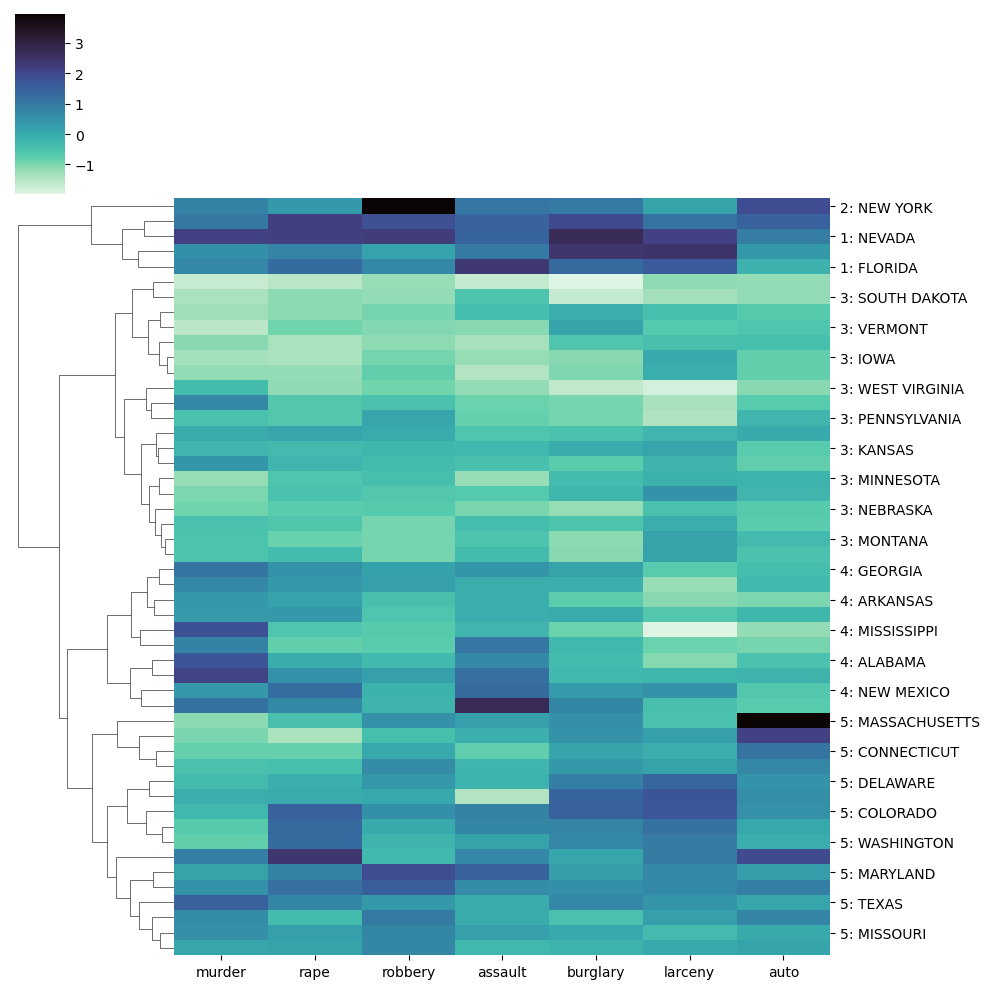

In [273]:
rates_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_cmp, rates_df_norm.index)]
sns.clustermap(rates_df_norm, method='complete', col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for Utulities Hierachical Clustering with complete Linkage Method')
plt.show()

In [275]:
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()

kmeans_5 = KMeans(n_clusters=5, random_state=0, n_init=1).fit(rates_df_norm)

memb_km5 = pd.Series(kmeans_5.labels_, index=rates_df_norm.index)
 
print('Cluster Membership for 5 Clusters Using k-Means Clustering')
print()
for key, item in memb_km5.groupby(memb_km5):
    print(key, ': ', ', '.join(item.index))

Cluster Membership for 5 Clusters Using k-Means Clustering

0 :  IDAHO, IOWA, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN, WYOMING
1 :  ARIZONA, CALIFORNIA, FLORIDA, NEVADA, NEW YORK
2 :  ALASKA, COLORADO, DELAWARE, HAWAII, MARYLAND, MICHIGAN, NEW MEXICO, OREGON, SOUTH CAROLINA, TEXAS, WASHINGTON
3 :  ALABAMA, ARKANSAS, GEORGIA, ILLINOIS, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, MISSOURI, NORTH CAROLINA, OHIO, OKLAHOMA, TENNESSEE, VIRGINIA
4 :  CONNECTICUT, MASSACHUSETTS, NEW JERSEY, RHODE ISLAND


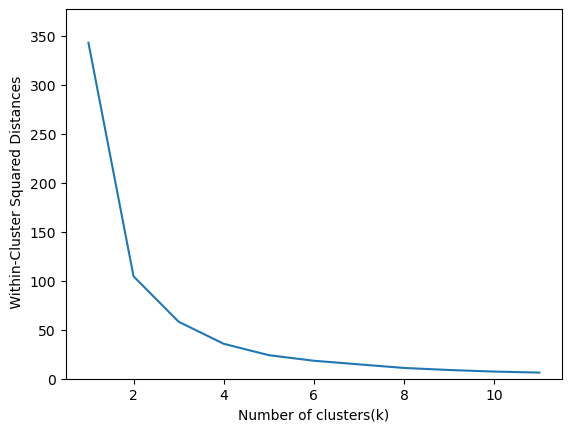

In [268]:
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(rates_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})


ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel(' Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [269]:
centroids = pd.DataFrame(kmeans_5.cluster_centers_, 
                    columns=rates_df_norm.columns)


centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 5')
centroids

Cluster Centroids for k-Means Clustering with k = 5


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
0,-1.011,-0.941,-0.855,-0.932,-0.902,-0.490,-0.646,Cluster 0
1,1.059,1.357,1.785,1.470,1.881,1.500,0.902,Cluster 1
2,0.210,1.014,0.350,0.628,0.725,0.884,0.310,Cluster 2
3,0.733,-0.046,-0.048,0.045,-0.355,-0.646,-0.408,Cluster 3
4,-0.858,-0.786,0.196,-0.239,0.368,-0.046,1.973,Cluster 4


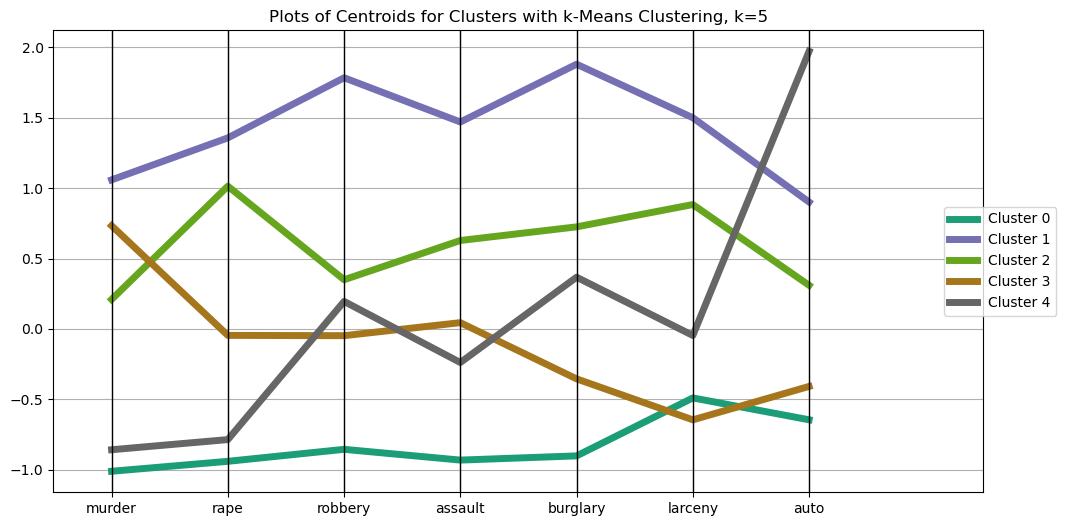

In [270]:

plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=5')
plt.show()

Heatmap for k-Means Clustering with 5 Clusters


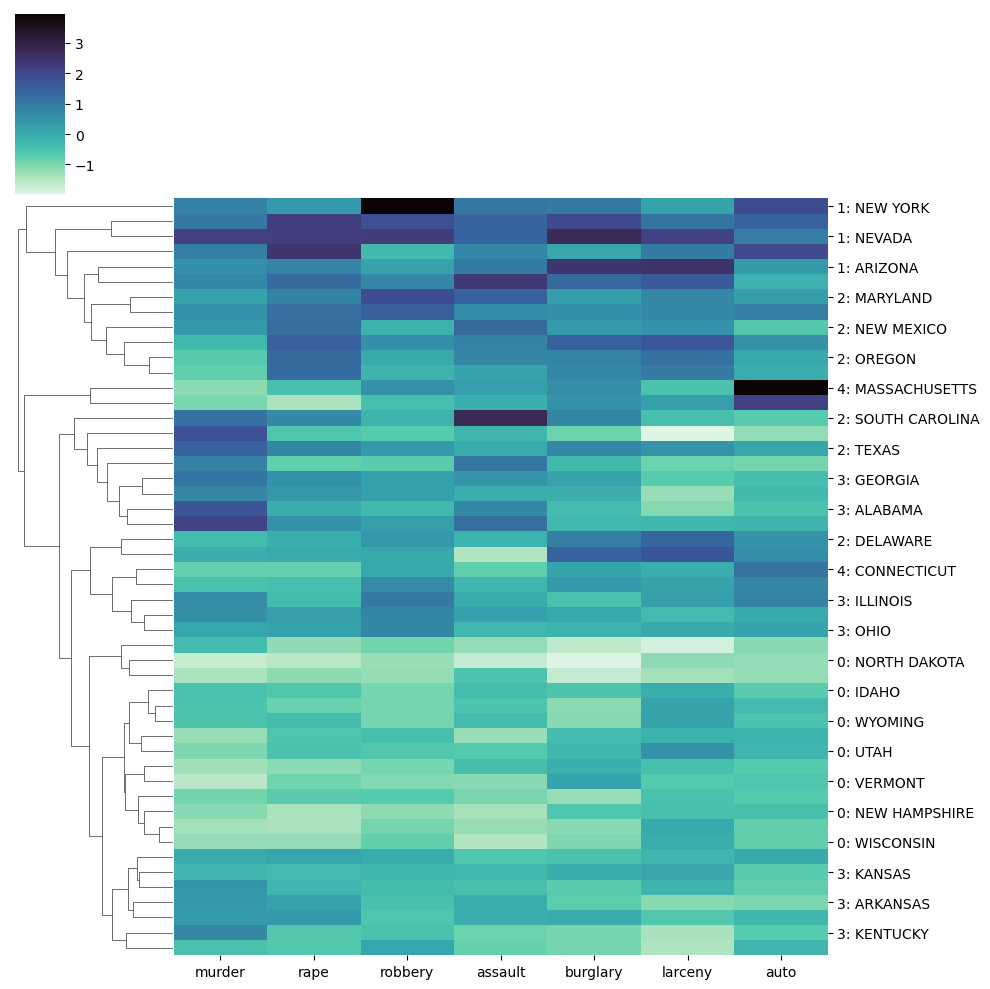

In [271]:

rates_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km5, rates_df_norm.index)]
sns.clustermap(rates_df_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 5 Clusters')
plt.show()